In [8]:
import os
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model
from sklearn.cross_decomposition import PLSRegression
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Data Input

In this section, we will input the data from 2 files: 'Labels and Concentration.txt' and 'Raman Spectra.csv'. Final data sized in 120 rows and 615 columns. 613 columns from the raman spectra, 1 column for the labels, and 1 column for concentration of each samples.

In [9]:
# Read the file into a list of lines
with open('Labels.txt', 'r') as file:
    lines = file.readlines()
    
# Process the data
data = []
for line in lines:
    # Split the line by whitespace
    parts = line.split()
    # Append a tuple of (first part, second part, third part) to the data list
    data.append((parts[0],float(parts[1])))

# Create a DataFrame from the data list
df = pd.DataFrame(data, columns=['concentration', 'labels'])

# Display the DataFrame
print(df)

   concentration    labels
0          CPO.C  7.231181
1          CPO.C  6.440270
2          CPO.C  5.536373
3          CPO.W  5.875334
4          CPO.W  5.875334
5          CPO.W  4.971437
6          CPO.W  7.344168
7          CPO.W  7.118194
8          CPO.W  6.440270
9          CPO.K  4.519488
10         CPO.K  4.293514
11         CPO.K  3.615590
12        CPO.MM  5.197411
13        CPO.MM  5.084424
14        CPO.MM  5.084424
15        CPO.MM  5.084424
16        CPO.MM  6.101309
17         CPO.W  6.327283
18         CPO.W  4.858450
19         CPO.W  5.197411
20         CPO.W  4.858450
21         CPO.W  5.084424
22         CPO.W  5.649360
23         CPO.W  4.858450
24         CPO.W  4.971437
25         CPO.W  4.971437
26         CPO.W  5.197411
27         CPO.W  7.118194
28         CPO.W  5.875334
29         CPO.W  4.745462


In [10]:
raman_full = pd.read_csv('RamanCPO.csv')

print(raman_full) #Showing first 5 data

      1799.19    1797.46    1795.74    1794.02    1792.29    1790.57  \
0   49.847706  49.694997  47.176765  42.905917  37.495324  31.557828   
1   48.780432  51.550474  50.069104  45.414982  38.666721  30.902893   
2    0.558753   2.212068   3.084047   3.317088   3.053579   2.435904   
3   29.473196  27.890137  25.110104  21.465330  17.288031  12.910408   
4   44.316815  39.552328  36.591366  34.692444  33.114071  31.114749   
5    0.101778   0.271498   0.588329   0.978604   1.368654   1.684810   
6   65.295167  74.481910  76.744897  73.414209  65.819845  55.291727   
7   57.855035  66.602564  68.477080  64.866082  57.156984  46.737138   
8    2.347753   2.016581   1.575358   1.097388   0.655974   0.324418   
9   36.378612  27.572736  22.228926  19.367300  18.007993  17.171148   
10  54.128529  49.357510  45.207448  41.460531  37.898937  34.304825   
11  -0.000137   0.354657   0.465915   0.406797   0.250462   0.070067   
12  27.024943  25.388351  23.837863  22.299852  20.700682  18.96

In [11]:
all_data = pd.concat([raman_full, df], axis=1, ignore_index=True)
all_data.rename(columns={740: 'labels', 741: 'concentration'}, inplace=True)
labels = all_data['labels'].values

print(all_data)

            0          1          2          3          4          5  \
0   49.847706  49.694997  47.176765  42.905917  37.495324  31.557828   
1   48.780432  51.550474  50.069104  45.414982  38.666721  30.902893   
2    0.558753   2.212068   3.084047   3.317088   3.053579   2.435904   
3   29.473196  27.890137  25.110104  21.465330  17.288031  12.910408   
4   44.316815  39.552328  36.591366  34.692444  33.114071  31.114749   
5    0.101778   0.271498   0.588329   0.978604   1.368654   1.684810   
6   65.295167  74.481910  76.744897  73.414209  65.819845  55.291727   
7   57.855035  66.602564  68.477080  64.866082  57.156984  46.737138   
8    2.347753   2.016581   1.575358   1.097388   0.655974   0.324418   
9   36.378612  27.572736  22.228926  19.367300  18.007993  17.171148   
10  54.128529  49.357510  45.207448  41.460531  37.898937  34.304825   
11  -0.000137   0.354657   0.465915   0.406797   0.250462   0.070067   
12  27.024943  25.388351  23.837863  22.299852  20.700682  18.96

In [12]:
X = all_data.drop(columns=['concentration', 'labels']).values
y = all_data['concentration'].values

In [13]:
print(X)

[[ 4.9847706e+01  4.9694997e+01  4.7176765e+01 ...  5.0771499e+01
   6.7431835e+01  9.8958017e+01]
 [ 4.8780432e+01  5.1550474e+01  5.0069104e+01 ...  7.0381777e+01
   7.2264724e+01  7.5931986e+01]
 [ 5.5875300e-01  2.2120680e+00  3.0840470e+00 ...  1.0892790e+01
   5.7504650e+00 -2.6780000e-03]
 ...
 [ 3.6844300e+01  4.2295383e+01  4.3311353e+01 ...  4.6314828e+01
   5.1434803e+01  5.8267973e+01]
 [ 4.2822643e+01  4.8652026e+01  4.9701148e+01 ...  5.9589782e+01
   7.2484707e+01  9.6677953e+01]
 [ 1.8416480e+00  2.4474780e+00  2.8125910e+00 ...  7.7106000e-02
   1.1373770e+00  3.4093490e+00]]


In [14]:
np.array(y).shape, X.shape

((30,), (30, 740))

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, labels_train, labels_test = train_test_split(X, y, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val, labels_train, labels_val = train_test_split(X_train, y_train, labels_train, test_size=0.2, random_state=43)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19, 740), (6, 740), (19,), (6,))

In [17]:
#K Fold Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [18]:
# Find best number of components using PRESS and cross-validation
# Parameters:
n_components = 10 # number of components to test
press_train = []
press_test = []
fold = KFold(n_splits=3, shuffle=True, random_state=42)

for i in range(1, n_components + 1):
    pls = PLSRegression(n_components = i)
    press_train.append(-np.mean(cross_val_score(pls, X_train, y_train, cv=fold, scoring='neg_mean_squared_error')))
    press_test.append(-np.mean(cross_val_score(pls, X_test, y_test, cv=fold, scoring='neg_mean_squared_error')))

c:\Users\Hp\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:271: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
c:\Users\Hp\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:271: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
c:\Users\Hp\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:271: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
c:\Users\Hp\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:271: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
c:\Users\Hp\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:271: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
c:\Users\Hp\anaconda3\lib\site-packages\

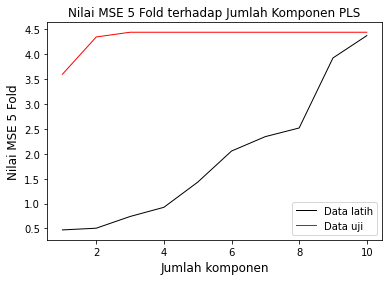

In [36]:
# Plotting the PRESS values for the training and validation sets:
plt.plot(range(1, 11), press_train[:10], label = 'Data latih', linewidth=1, color='black')
plt.plot(range(1, 11), press_test[:10], label = 'Data uji', linewidth=1, color='red')
plt.xlabel('Jumlah komponen', fontsize = 12)
plt.ylabel('Nilai MSE 5 Fold', fontsize = 12)
plt.title('Nilai MSE 5 Fold terhadap Jumlah Komponen PLS', fontsize = 12)
#plt.xticks(range(1, n_components + 1, 5))
plt.legend()
plt.show()

In [37]:
press_train_norm = (press_train - np.min(press_train)) / (np.max(press_train) - np.min(press_train))
press_test_norm = (press_test - np.min(press_test)) / (np.max(press_test) - np.min(press_test))
best_n_components = np.argmin(press_train_norm) + 1
print('The best number of components is:', best_n_components)

The best number of components is: 1


In [21]:
pls = PLSRegression(n_components = best_n_components)
pls.fit(X_train, y_train)
y_pred_train = pls.predict(X_train)
y_pred_val = pls.predict(X_val)
y_pred_test = pls.predict(X_test)

y_pred_train = np.clip(y_pred_train, 0, None)
y_pred_val = np.clip(y_pred_val, 0, None)
y_pred_test = np.clip(y_pred_test, 0, None)

In [38]:
# Evaluation metrics:
# RMSE:
rmse_train = np.sqrt(np.mean((y_pred_train - y_train)**2))
rmse_val = np.sqrt(np.mean((y_pred_val - y_val)**2))
rmse_test = np.sqrt(np.mean((y_pred_test - y_test)**2))

# MAE:
mae_train = np.mean(np.abs(y_pred_train - y_train))
mae_val = np.mean(np.abs(y_pred_val - y_val))
mae_test = np.mean(np.abs(y_pred_test - y_test))

df = pd.DataFrame({'RMSE': [rmse_train, rmse_val, rmse_test], 'MAE': [mae_train, mae_val, mae_test]}, index = ['Train', 'Validation', 'Test'])
df.round(3)

,RMSE,MAE
Train,0.978,0.750
Validation,1.042,0.848
Test,1.030,0.908


In [39]:
# Print some results:
y_test = np.round(y_test, 4)
y_pred_test = np.round(y_pred_test, 4)

df = pd.DataFrame({'Real concentration A': y_test, 'Predicted concentration A': y_pred_test[:,0]})
# Multi level column names:
df.columns = pd.MultiIndex.from_product([['Data'], ['Real', 'Predicted']])
df.index += 1
df[:10]

Data          
     Real Predicted
1  7.1182    5.8501
2  5.0844    5.3038
3  4.8584    5.4794
4  6.3273    5.3994
5  6.4403    5.0132
6  4.5195    5.4568

In [40]:
# Concatenate predictions and actual values for comparison
y_pred = np.concatenate((y_pred_train, y_pred_val, y_pred_test), axis=0)
y = np.concatenate((y_train, y_val, y_test), axis=0)
labels_all = np.concatenate((labels_train, labels_val, labels_test), axis=0)

# Round the predictions and actual values
y_pred = np.round(y_pred, 4)
y = np.round(y, 4)

df_results = pd.DataFrame({'Label': labels_all, 'Prediction': y_pred[:, 0], 'Real': y})

print(df_results.head(20))

     Label  Prediction    Real
0    CPO.W      4.6668  5.1974
1    CPO.K      4.6474  3.6156
2    CPO.W      5.5446  4.9714
3    CPO.C      4.9367  5.5364
4    CPO.W      5.2537  4.9714
5    CPO.W      4.7821  5.6494
6    CPO.W      4.6357  4.8584
7    CPO.C      5.8863  7.2312
8    CPO.W      5.4892  5.1974
9   CPO.MM      5.2931  5.0844
10   CPO.K      5.7235  4.2935
11   CPO.W      5.4914  5.0844
12  CPO.MM      5.3055  5.1974
13  CPO.MM      5.2845  5.0844
14   CPO.W      6.6011  7.1182
15   CPO.W      4.6470  4.8584
16   CPO.W      4.6574  4.7455
17   CPO.W      5.7646  5.8753
18   CPO.W      5.8350  5.8753
19   CPO.W      4.9744  4.9714


In [25]:
df_results

,Label,Prediction,Real
0,CPO.W,4.6668,5.1974
1,CPO.K,4.6474,3.6156
2,CPO.W,5.5446,4.9714
3,CPO.C,4.9367,5.5364
4,CPO.W,5.2537,4.9714
5,CPO.W,4.7821,5.6494
6,CPO.W,4.6357,4.8584
7,CPO.C,5.8863,7.2312
8,CPO.W,5.4892,5.1974
9,CPO.MM,5.2931,5.0844


In [26]:
# Extract the concentration column for rows with label 'a' from df_data
df_data_a_concentration = all_data[all_data['labels'] == 'CPKO.W']['concentration']
print("Concentration values for df_data with label CPKO.W:")
print(df_data_a_concentration)

# Extract rows with label 'a' from df_results
df_results_a = df_results[df_results['Label'] == 'CPKO.W']
print("\ndf_results with label CPKO.W:")
print(df_results_a)

Concentration values for df_data with label CPKO.W:
Series([], Name: concentration, dtype: float64)

df_results with label CPKO.W:
Empty DataFrame
Columns: [Label, Prediction, Real]
Index: []


In [27]:
# Extract unique values from the 'Label' column
unique_labels = df_results['Label'].unique().tolist()

# Print the list
print(unique_labels)

['CPO.W', 'CPO.K', 'CPO.C', 'CPO.MM']


In [28]:
# Loop through each unique label and print the corresponding rows
for label in unique_labels:
    print(f"Label: {label}")
    print(df_results[df_results['Label'] == label])
    print()

Label: CPO.W
    Label  Prediction    Real
0   CPO.W      4.6668  5.1974
2   CPO.W      5.5446  4.9714
4   CPO.W      5.2537  4.9714
5   CPO.W      4.7821  5.6494
6   CPO.W      4.6357  4.8584
8   CPO.W      5.4892  5.1974
11  CPO.W      5.4914  5.0844
14  CPO.W      6.6011  7.1182
15  CPO.W      4.6470  4.8584
16  CPO.W      4.6574  4.7455
17  CPO.W      5.7646  5.8753
18  CPO.W      5.8350  5.8753
19  CPO.W      4.9744  4.9714
22  CPO.W      5.6160  5.8753
23  CPO.W      6.5786  7.3442
24  CPO.W      5.8501  7.1182
26  CPO.W      5.4794  4.8584
27  CPO.W      5.3994  6.3273
28  CPO.W      5.0132  6.4403

Label: CPO.K
    Label  Prediction    Real
1   CPO.K      4.6474  3.6156
10  CPO.K      5.7235  4.2935
29  CPO.K      5.4568  4.5195

Label: CPO.C
    Label  Prediction    Real
3   CPO.C      4.9367  5.5364
7   CPO.C      5.8863  7.2312
20  CPO.C      5.9592  6.4403

Label: CPO.MM
     Label  Prediction    Real
9   CPO.MM      5.2931  5.0844
12  CPO.MM      5.3055  5.1974
13  CPO.MM 

In [29]:
with pd.ExcelWriter('output.xlsx', engine='xlsxwriter') as writer:
    # Loop through each unique label and write to a separate sheet
    for label in unique_labels:
        df_results[df_results['Label'] == label].to_excel(writer, sheet_name=label, index=False)

print("Data saved to output.xlsx")

Data saved to output.xlsx


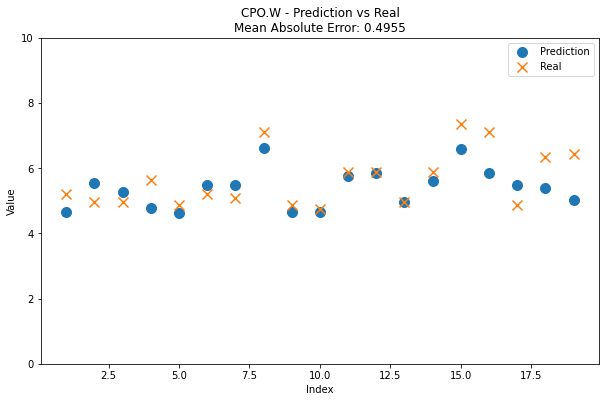

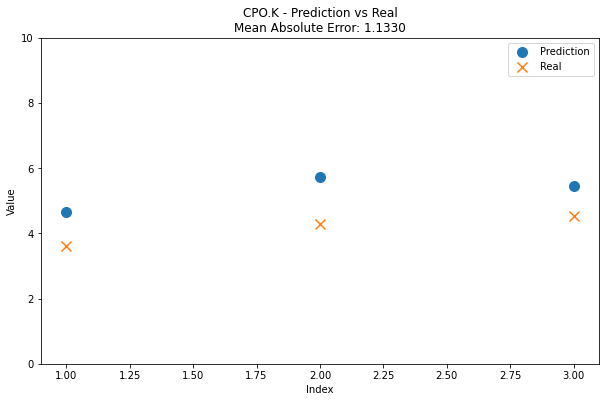

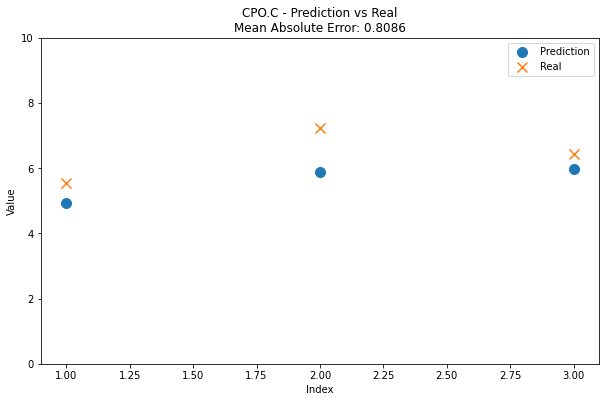

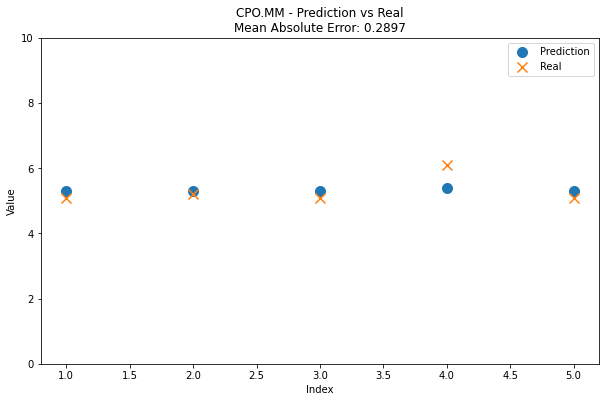

In [30]:
for label in unique_labels:
    subset_df = df_results[df_results['Label'] == label]
    
    # Calculate the error (Mean Absolute Error)
    mae = (subset_df['Prediction'] - subset_df['Real']).abs().mean()
    
    # Create a new index from 1 to the length of the subset
    new_index = range(1, len(subset_df) + 1)
    
    # Plot the data as scatter plot without lines
    plt.figure(figsize=(10, 6))
    plt.scatter(new_index, subset_df['Prediction'], label='Prediction', marker='o', s=100)
    plt.scatter(new_index, subset_df['Real'], label='Real', marker='x', s=100)
    plt.ylim(0, 10)
    # Add title and labels
    plt.title(f'{label} - Prediction vs Real\nMean Absolute Error: {mae:.4f}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    
    # Show the plot
    plt.show()

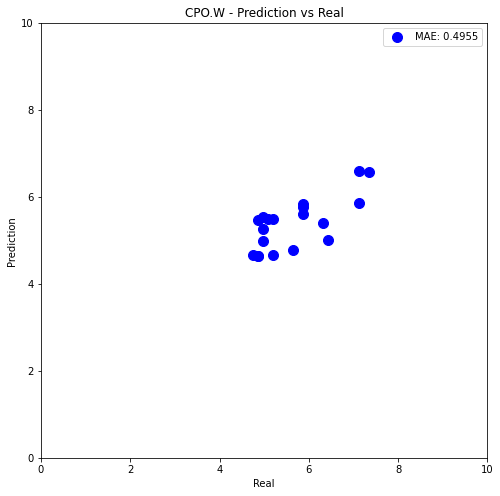

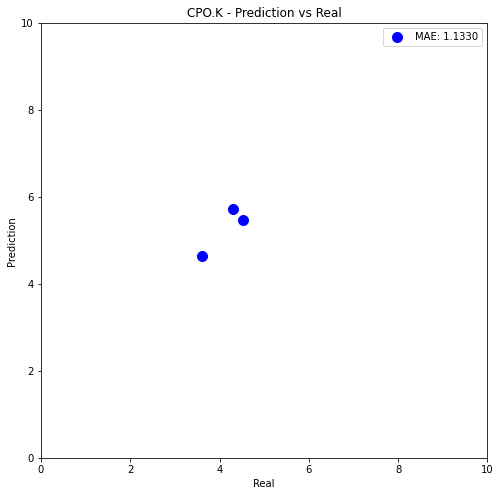

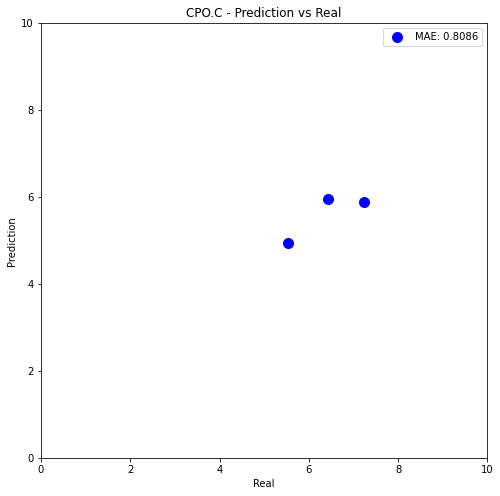

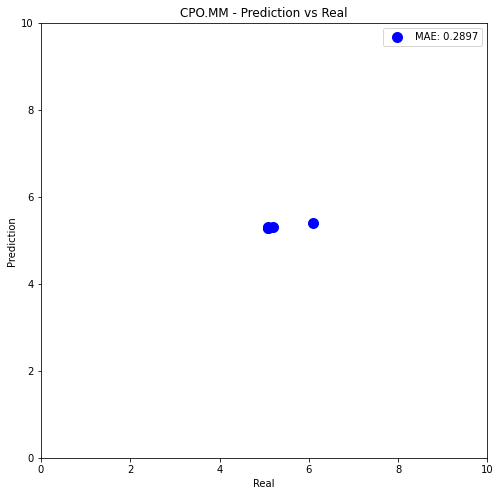

In [33]:
for label in unique_labels:
    subset_df = df_results[df_results['Label'] == label]
    
    # Calculate the error (Mean Absolute Error)
    mae = (subset_df['Prediction'] - subset_df['Real']).abs().mean()
    
    # Plot the data
    plt.figure(figsize=(8, 8))
    plt.scatter(subset_df['Real'], subset_df['Prediction'], label=f'MAE: {mae:.4f}', color='blue', s=100)
    
    # Plot y=x line for reference
    #plt.plot([0, 10], [0, 10], linestyle='--', color='red', label='y=x')
    
    # Set the limits for x and y axes
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    
    # Add title and labels
    plt.title(f'{label} - Prediction vs Real')
    plt.xlabel('Real')
    plt.ylabel('Prediction')
    plt.legend()
    
    # Show the plot
    plt.show()

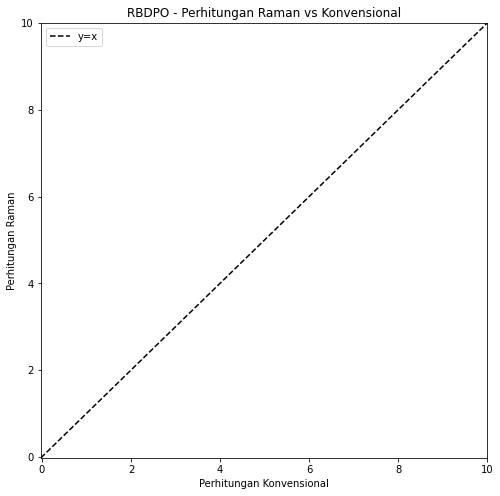

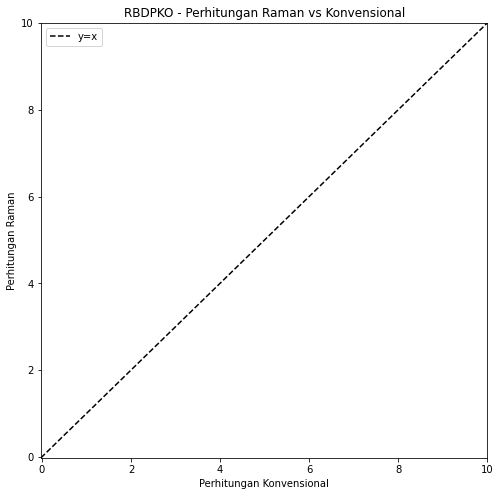

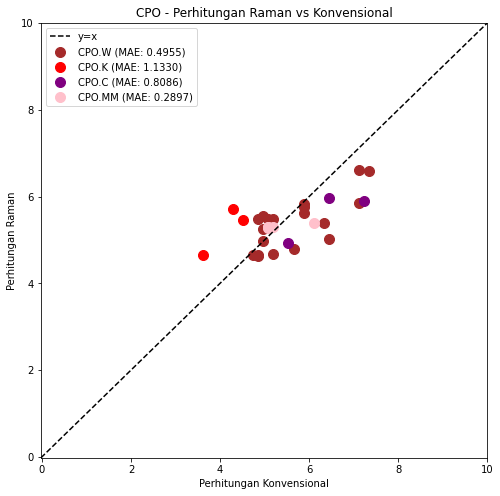

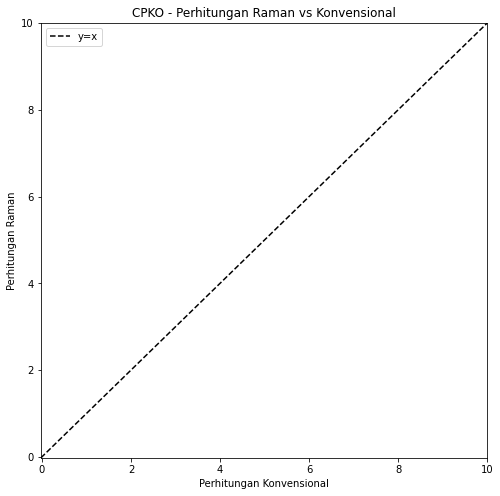

In [41]:
# Categories to filter
categories = ['RBDPO', 'RBDPKO', 'CPO', 'CPKO']

# Colors for different samples
colors = {
    'CPKO.A': 'blue',
    'CPKO.W': 'green',
    'CPKO.MM': 'orange',
    'CPO.C': 'purple',
    'CPO.K': 'red',
    'CPO.W': 'brown',
    'CPO.MM': 'pink',
    'RBDPKO.A': 'lightblue',
    'RBDPKO.W': 'cyan',
    'RBDPKO.MM': 'magenta',
    'RBDPO.A': 'yellow',
    'RBDPO.W': 'grey',
    'RBDPO.MM': 'black'
}
for category in categories:
    # Filter data for each category
    category_data = df_results[df_results['Label'].str.contains(category)]
    
    plt.figure(figsize=(8, 8))
    
    for sample in category_data['Label'].unique():
        sample_data = category_data[category_data['Label'] == sample]
        
        # Calculate the error (Mean Absolute Error)
        mae = (sample_data['Prediction'] - sample_data['Real']).abs().mean()
        
        # Plot the data
        plt.scatter(sample_data['Real'], sample_data['Prediction'], label=f'{sample} (MAE: {mae:.4f})',
                    color=colors[sample], s=100)
    
    # Plot y=x line for reference
    plt.plot([-0.02, 10], [-0.02, 10], linestyle='--', color='black', label='y=x')
    
    # Set the limits for x and y axes
    plt.xlim(-0.02, 10)
    plt.ylim(-0.02, 10)
    
    # Add title and labels
    plt.title(f'{category} - Perhitungan Raman vs Konvensional')
    plt.xlabel('Perhitungan Konvensional')
    plt.ylabel('Perhitungan Raman')
    plt.legend()
    
    # Show the plot
    plt.show()